In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## STEP 1: Dataset Loading and Initial Overview

In [15]:
df = pd.read_csv(r"D:\Datasets\ai_job_dataset.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [16]:
print('Dataset Shape:', df.shape)

Dataset Shape: (15000, 19)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [21]:
df['company_location'].unique()

array(['China', 'Canada', 'Switzerland', 'India', 'France', 'Germany',
       'United Kingdom', 'Singapore', 'Austria', 'Sweden', 'South Korea',
       'Norway', 'Netherlands', 'United States', 'Israel', 'Australia',
       'Ireland', 'Denmark', 'Finland', 'Japan'], dtype=object)

In [22]:
df['job_title'].unique()

array(['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'NLP Engineer', 'AI Consultant', 'AI Architect',
       'Principal Data Scientist', 'Data Analyst',
       'Autonomous Systems Engineer', 'AI Product Manager',
       'Machine Learning Engineer', 'Data Engineer', 'Research Scientist',
       'ML Ops Engineer', 'Robotics Engineer', 'Head of AI',
       'Deep Learning Engineer', 'Data Scientist',
       'Machine Learning Researcher', 'Computer Vision Engineer'],
      dtype=object)

In [23]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [24]:
print('\nmissing values per coulmn:')
print(df.isnull().sum())


missing values per coulmn:
job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [25]:
print ('\ncolumns datatypes')
print(df.dtypes)


columns datatypes
job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object


## STEP 2: Data Cleaning & Feature Preparation

#### Convert date columns to datetime format

In [28]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

#### Normalize text columns: remove leading/trailing whitespace and lowercase

In [30]:
categorical_cols = [
    'job_title', 'salary_currency', 'experience_level', 'employment_type',
    'company_location', 'company_size', 'employee_residence',
    'education_required', 'industry', 'company_name'
]

for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

#### Display unique values in key categorical columns

In [32]:
print("Unique values in 'experience_level':", df['experience_level'].unique())
print("Unique values in 'employment_type':", df['employment_type'].unique())
print("Unique values in 'company_size':", df['company_size'].unique())
print("Unique values in 'remote_ratio':", df['remote_ratio'].unique())

Unique values in 'experience_level': ['se' 'en' 'mi' 'ex']
Unique values in 'employment_type': ['ct' 'fl' 'pt' 'ft']
Unique values in 'company_size': ['m' 'l' 's']
Unique values in 'remote_ratio': [ 50 100   0]


## STEP 3: Exploratory Data Analysis (EDA)

#### Set Style

In [35]:
sns.set(style = 'whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

### 1. Salary Distribution

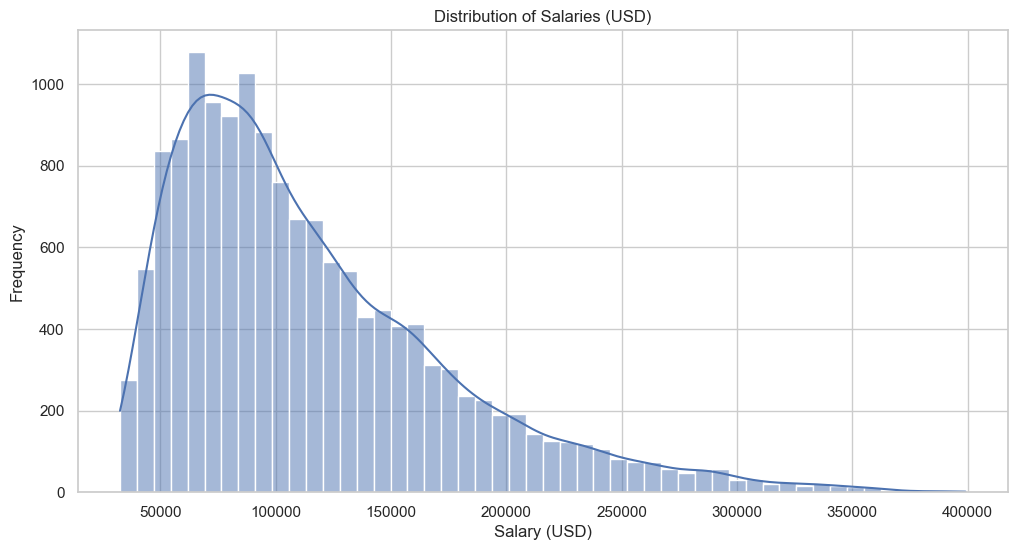

In [37]:
plt.figure()
sns.histplot(df['salary_usd'], bins = 50, kde = True)
plt.title("Distribution of Salaries (USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

### 2. Salary by Experience Leve


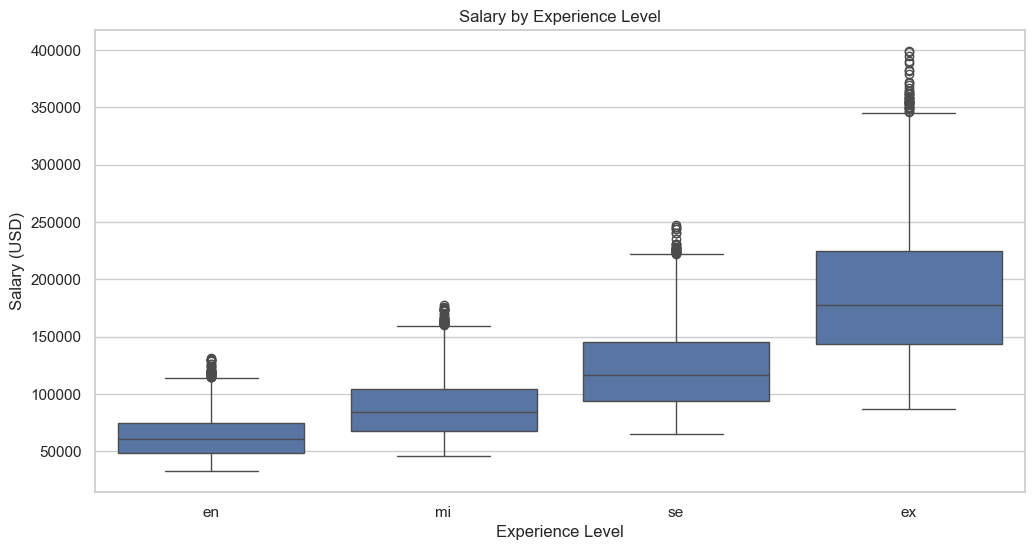

In [39]:
plt.figure()
sns.boxplot(x='experience_level', y='salary_usd', data=df, order=['en', 'mi', 'se', 'ex'])
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

### 3. Salary by Employment Type

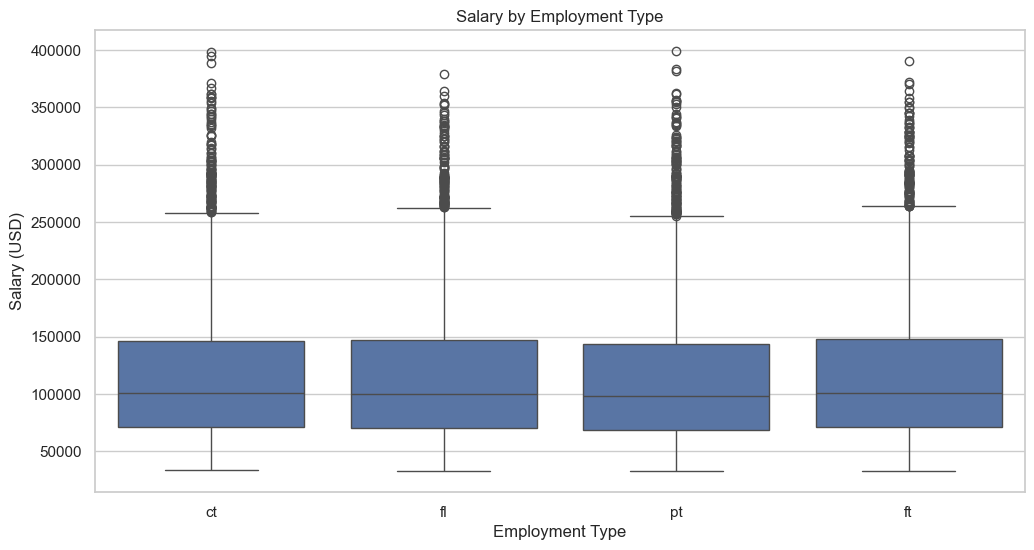

In [41]:
plt.figure()
sns.boxplot(x='employment_type', y='salary_usd', data=df)
plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()

### 4. Salary by Remote Ratio

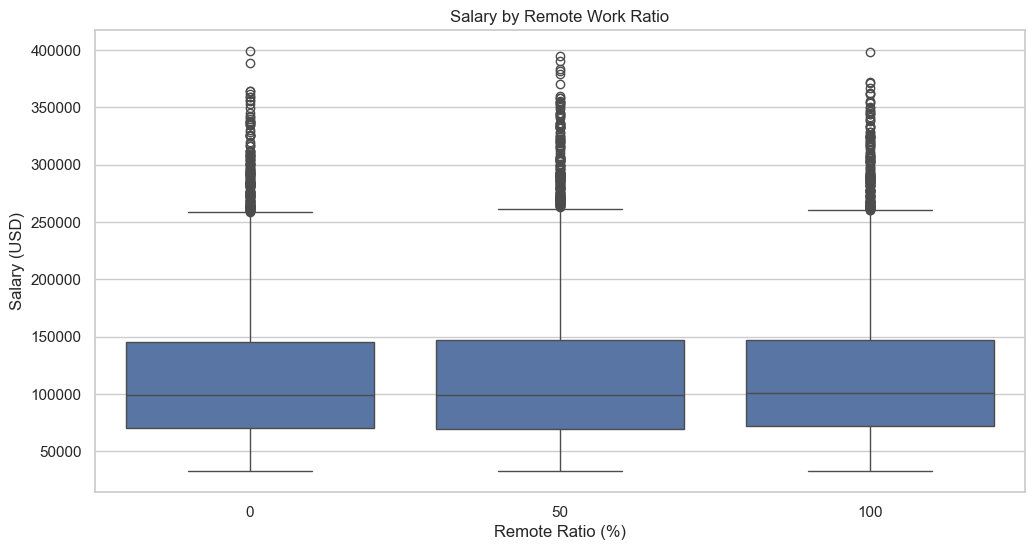

In [43]:
plt.figure()
sns.boxplot(x='remote_ratio', y='salary_usd', data=df)
plt.title("Salary by Remote Work Ratio")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.show()

### 5. Average Salary by Company Size (Fixed)

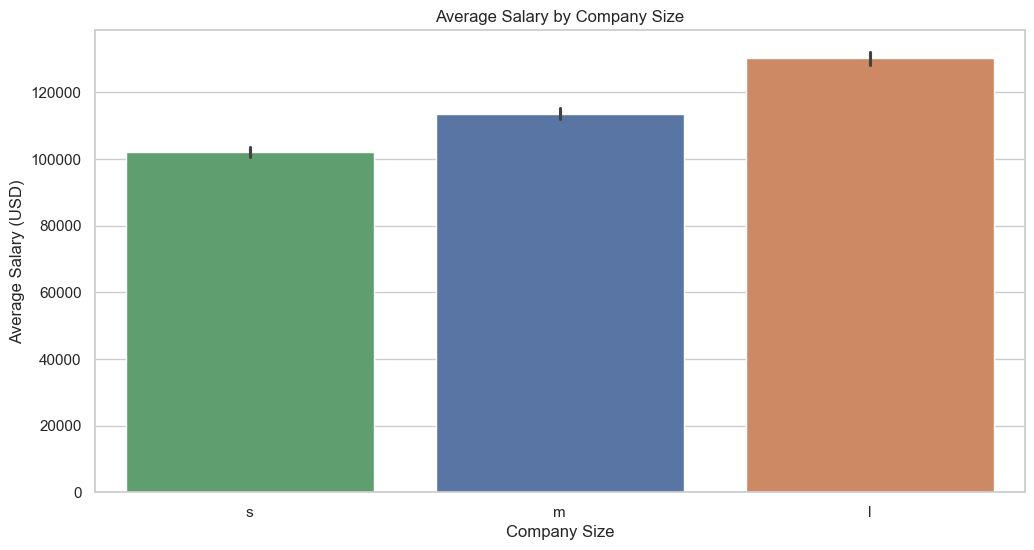

In [45]:
plt.figure()
sns.barplot(x='company_size', y='salary_usd',hue = 'company_size', data=df, estimator=np.mean, order=['s', 'm', 'l'])
plt.title("Average Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.show()

### 6. Top 10 Industries by Job Coun

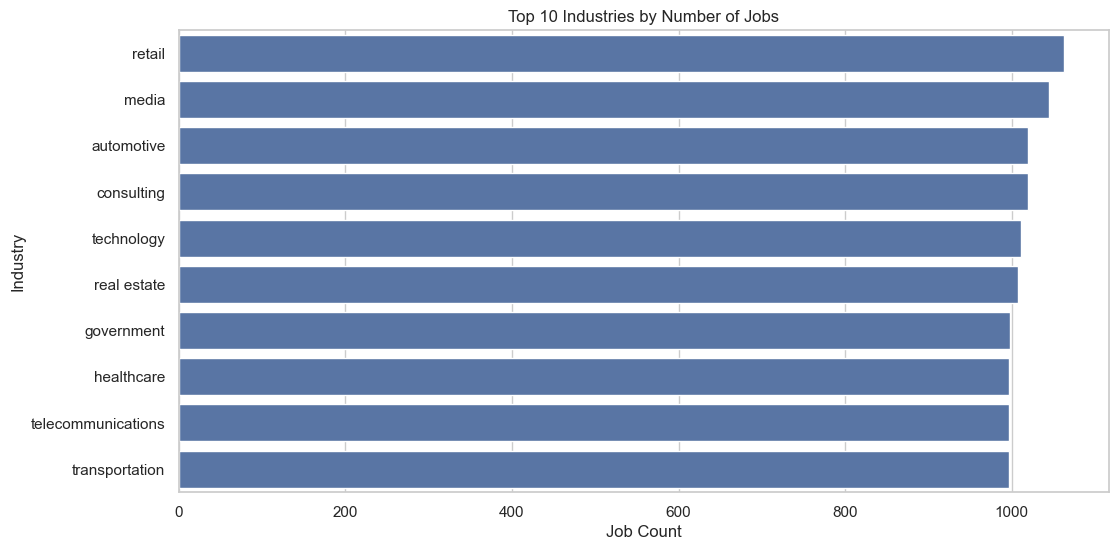

In [47]:
plt.figure()
top_industries = df['industry'].value_counts().head(10)
sns.barplot(x = top_industries.values, y = top_industries.index)
plt.title("Top 10 Industries by Number of Jobs")
plt.xlabel("Job Count")
plt.ylabel("Industry")
plt.show()

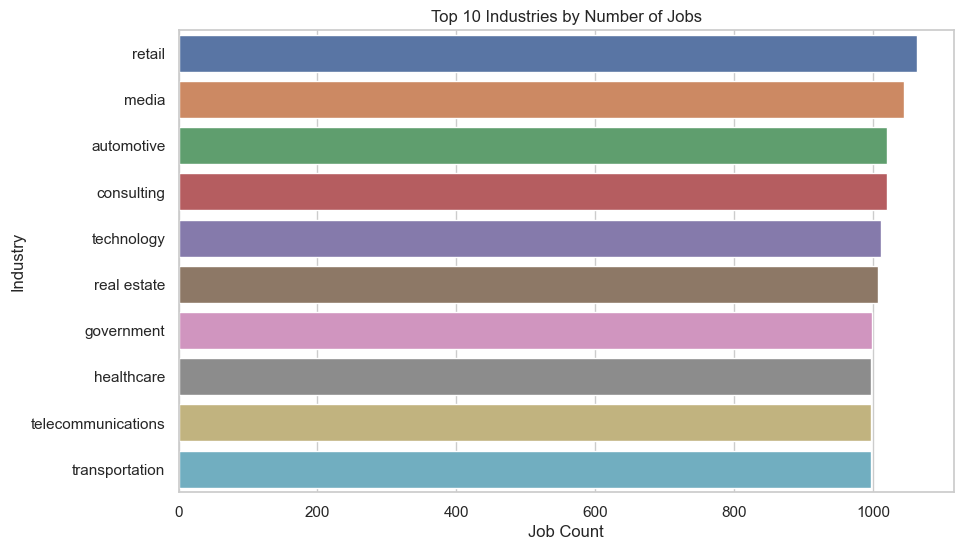

In [48]:
plt.figure(figsize=(10, 6))
top_industries = df['industry'].value_counts().head(10)
industry_df = top_industries.reset_index()
industry_df.columns = ['industry', 'count']

sns.barplot(data=industry_df, x='count', y='industry', hue='industry')  # now hue works
plt.title("Top 10 Industries by Number of Jobs")
plt.xlabel("Job Count")
plt.ylabel("Industry")
plt.legend([],[], frameon=False)  # optional: hide duplicate legend
plt.show()


## STEP 4: Feature Engineering and ML Preparation

In [50]:
from sklearn.preprocessing import LabelEncoder

### Create a copy of the original dataset for modeling

In [52]:
df_model = df.copy()

### Drop columns that are not useful for modeling¶

In [54]:
df_model.drop(['job_id','posting_date', 'application_deadline', 'company_name'], axis=1, inplace=True)

### Define categorical columns to encode

In [56]:
categorical_features =[
     'job_title', 'salary_currency', 'experience_level', 'employment_type',
    'company_location', 'company_size', 'employee_residence',
    'education_required', 'industry'
]

### Apply Label Encoding to categorical features

In [58]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

### Separate features and target for salary prediction (regression)

In [60]:
X_reg = df_model.drop('salary_usd', axis = 1)
y_reg = df_model['salary_usd']

#### Display final shapes of feature matrix and target vector

In [62]:
print('Features Matrix Shape: ', X_reg.shape)
print('Target Matrix Shape: ', y_reg.shape)

Features Matrix Shape:  (15000, 14)
Target Matrix Shape:  (15000,)


### STEP 5: Regression Modeling & Model Comparison

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Remove 'required_skills' for now (text-based)

In [66]:
X = df_model.drop(['salary_usd', 'required_skills'], axis=1)
y = df_model['salary_usd']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

#### Feature Scaling

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Define Models

In [71]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=537),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=537)
}

### Store results

In [73]:
results = []

### Train & Evaluate Each Model

In [75]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })

    

### Show results

In [77]:
results

[{'Model': 'Linear Regression',
  'MAE': 26801.231186980473,
  'MSE': 1371426263.5701897,
  'RMSE': 37032.77283123949,
  'R2 Score': 0.6040220585726233},
 {'Model': 'Random Forest',
  'MAE': 15076.599983333334,
  'MSE': 447192861.3555932,
  'RMSE': 21146.93503455272,
  'R2 Score': 0.8708800368168367},
 {'Model': 'XGBoost',
  'MAE': 14831.8720703125,
  'MSE': 428906432.0,
  'RMSE': 20710.05630122719,
  'R2 Score': 0.8761599659919739}]

In [78]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
2,XGBoost,14831.872070,4.289064e+08,20710.056301,0.876160
1,Random Forest,15076.599983,4.471929e+08,21146.935035,0.870880
0,Linear Regression,26801.231187,1.371426e+09,37032.772831,0.604022


### STEP 6: Visual Comparison of Regression Models

In [80]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="R2 Score", ascending=False)

### Plot R² Score

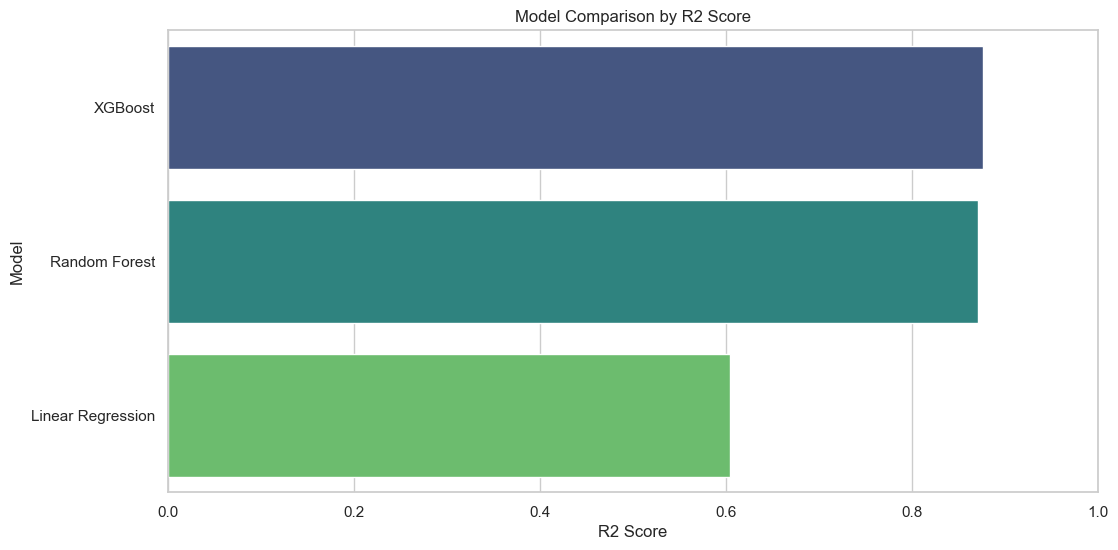

In [82]:
plt.figure()
sns.barplot(x = "R2 Score", y = "Model", data = results_df_sorted, palette = 'viridis')
plt.title("Model Comparison by R2 Score" )
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.xlim(0,1)
plt.show()

### Plot MAE

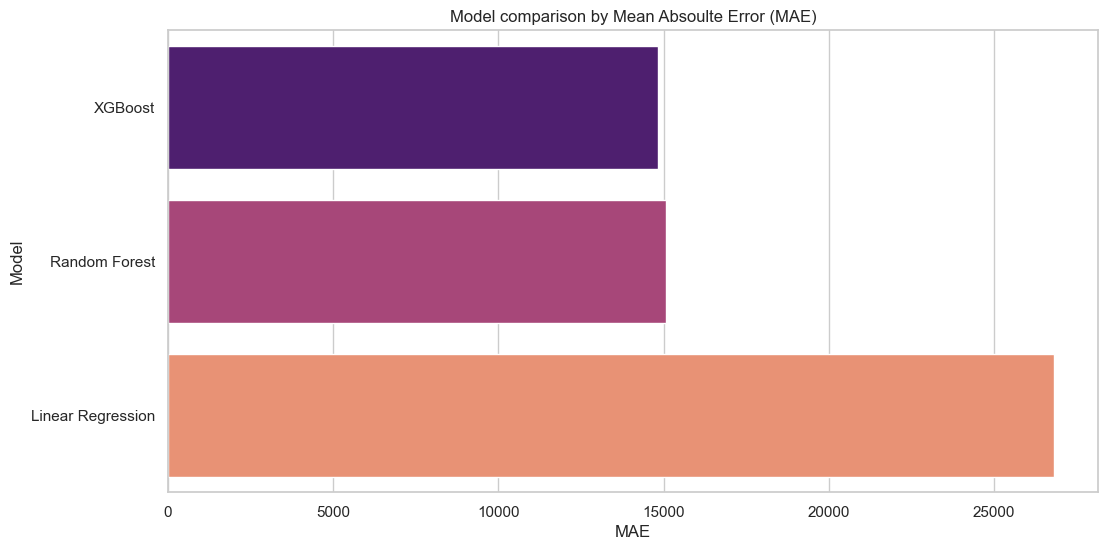

In [84]:
plt.figure()
sns.barplot(x = "MAE", y = "Model", data = results_df_sorted, palette = "magma")
plt.title("Model comparison by Mean Absoulte Error (MAE)")
plt.xlabel("MAE")
plt.ylabel("Model")
plt.show()

### Plot RMSE

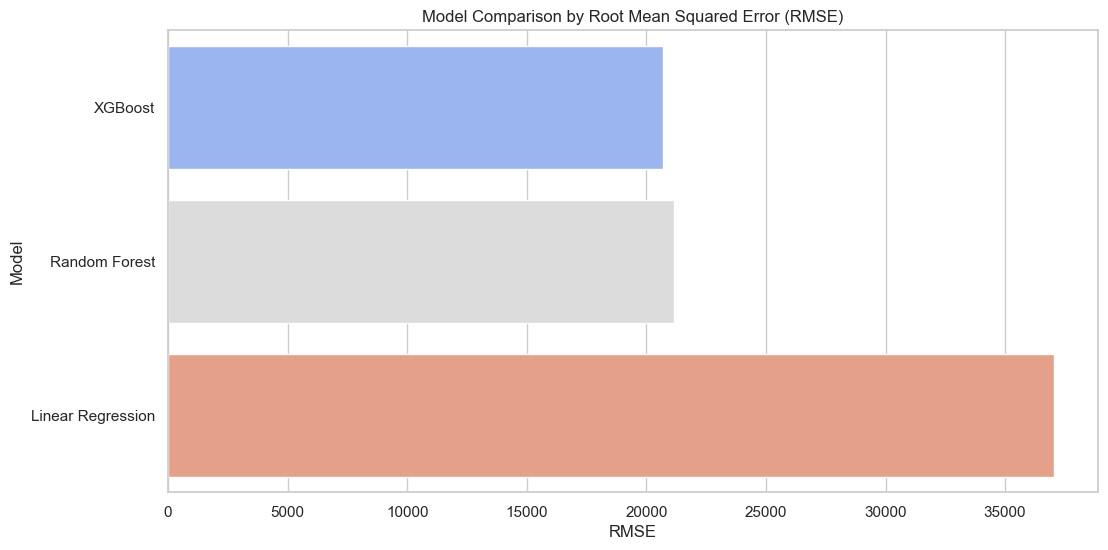

In [86]:
plt.figure()
sns.barplot(x = "RMSE", y = "Model", data = results_df_sorted, palette = "coolwarm")
plt.title("Model Comparison by Root Mean Squared Error (RMSE)")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.show()

## STEP 7: Deep Learning Regression Model with Keras

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Define the model

In [90]:
# Creating a neural network model using Sequential (layers are added one after another)
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (X_train_scaled.shape[1],)),  # First hidden layer with 128 neurons and ReLU activation
                                                                              # input_shape tells how many input features (columns) the data has
    
    Dropout(0.3),       # Dropout layer to randomly turn off 30% of the neurons to prevent overfitting
    Dense(64, activation = 'relu'),   # Second hidden layer with 64 neurons and ReLU activation
    Dropout(0.2),
    Dense(1)     # Output layer with 1 neuron (for regression, predicting a single value)
])

### Compile the Model

In [92]:
model.compile(optimizer = 'adam', loss = 'mse')   # - 'adam' is the optimizer that adjusts the weights to reduce error (it's fast and commonly used)
# - 'mse' (Mean Squared Error) is the loss function used for regression problems (measures how far predictions are from actual values)

## Train the model

In [94]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split = 0.2, # 20% of the training data will be used for validation (to check performance while training)
    epochs = 50,            # The model will go through the full training data 50 times
    batch_size = 32,        # The model will update its weights after every 32 samples
    verbose = 0              # 0 means no training output will be shown (silent mode)
)

###  Predict and evaluate

In [96]:
y_pred_dl = model.predict(X_test_scaled).flatten()

mae_dl = mean_absolute_error(y_test, y_pred_dl)
mse_dl = mean_squared_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)
r2_dl = r2_score(y_test, y_pred_dl)

94/94 [==============================] - 0s 1ms/step


### Append to results

In [98]:
results.append({
    "Model": "Deep Learning (Keras)",
    "MAE": mae_dl,
    "MSE": mse_dl,
    "RMSE": rmse_dl,
    "R2 Score": r2_dl
})

### Show updated results

In [100]:
results_df1 = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
results_df1

,Model,MAE,MSE,RMSE,R2 Score
2,XGBoost,14831.872070,4.289064e+08,20710.056301,0.876160
1,Random Forest,15076.599983,4.471929e+08,21146.935035,0.870880
3,Deep Learning (Keras),25451.291016,1.317617e+09,36298.996570,0.619559
0,Linear Regression,26801.231187,1.371426e+09,37032.772831,0.604022


### STEP 8: NLP Analysis of 'required_skills' – Skill Frequency Extraction

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

### Fill missing values just in case

In [104]:
df['required_skills'] = df['required_skills'].fillna('')

### Use CountVectorizer to tokenize skills separated by comma

In [106]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(", "), lowercase=True)

In [201]:
skill_matrix = vectorizer.fit_transform(df['required_skills']) 

### Extract skill names and their counts

In [211]:
skill_names = vectorizer.get_feature_names_out()
skill_counts = skill_matrix.sum(axis = 0).A1

### Create a DataFrame of skills and their frequencies

In [214]:
skill_frequent_df = pd.DataFrame({
    "Skill": skill_names,
    "Frequency": skill_counts
}).sort_values(by = "Frequency", ascending = False)

## Display top 20 most common skills

In [217]:
top_skills = skill_frequent_df.head(20)

In [221]:
#top_skills

### plot

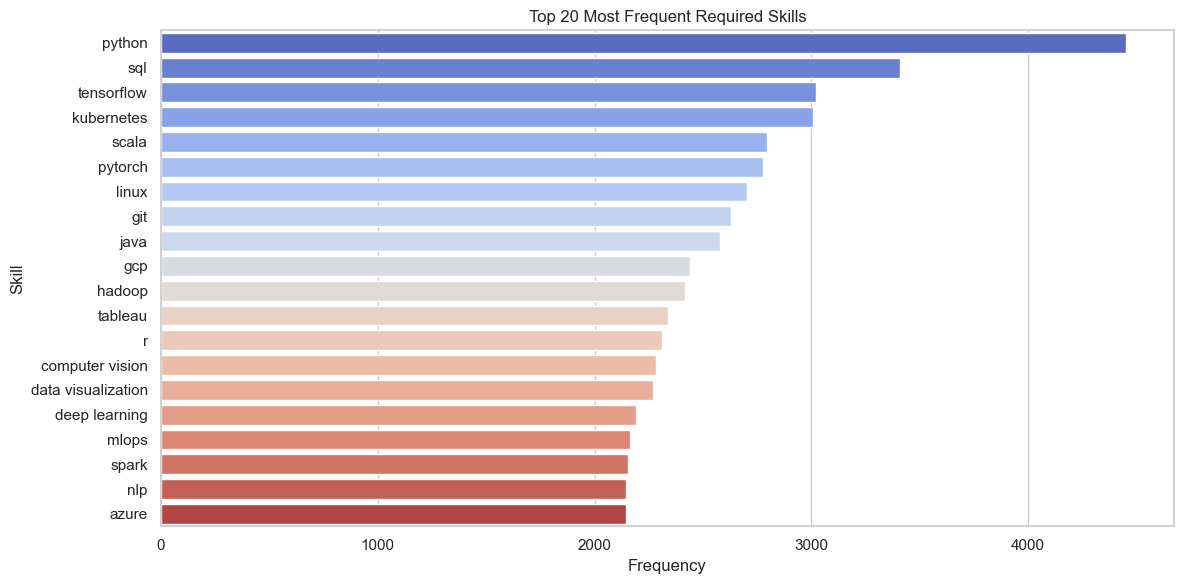

In [224]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_skills, x = 'Frequency', y = 'Skill', palette = 'coolwarm')
plt.title("Top 20 Most Frequent Required Skills")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()